In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv("./Dataset/train.csv")
test_data = pd.read_csv("./Dataset/test.csv")
cross_data = pd.read_csv("./Dataset/Dig-MNIST.csv")

In [3]:
train_data.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_y = train_data['label']
train_X = train_data.drop(['label'], axis = 1)

In [5]:
train_y.head(3)

0    0
1    1
2    2
Name: label, dtype: int64

In [6]:
train_X.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
import matplotlib.pyplot as plt

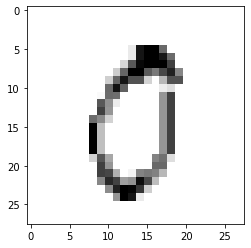

In [8]:
plt.imshow(np.array(train_X.iloc[0]).reshape(28,28), cmap= plt.cm.binary)

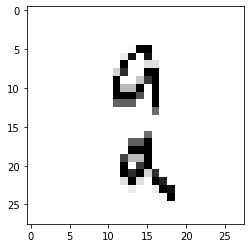

In [9]:
plt.imshow(np.array(train_X.iloc[23]).reshape(28,28), cmap= plt.cm.binary)

## Model Building

In [10]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(784, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [11]:
# model.fit(train_X.to_numpy(), train_y.to_numpy(), epochs=10)

## Evaluation

In [12]:
cross_y = cross_data['label']
cross_X = cross_data.drop(['label'], axis = 1)

In [13]:
# val_loss, val_acc = model.evaluate(cross_X.to_numpy(), cross_y.to_numpy()) # for 10 epochs -> 63% accuracy

In [14]:
model.fit(train_X.to_numpy(), train_y.to_numpy(), epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 37s 609us/sample - loss: 0.3822 - accuracy: 0.9391
Epoch 2/3
60000/60000 [==============================] - 15s 245us/sample - loss: 0.0913 - accuracy: 0.9749
Epoch 3/3
60000/60000 [==============================] - 15s 245us/sample - loss: 0.0741 - accuracy: 0.9801


In [15]:
val_loss, val_acc = model.evaluate(cross_X.to_numpy(), cross_y.to_numpy()) # for 3 epochs -> 63% accuracy

10240/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [16]:
model.save('kannada_mnist.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: kannada_mnist.model\assets


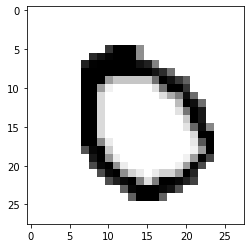

In [17]:
plt.imshow(np.array(cross_X.iloc[0]).reshape(28,28), cmap= plt.cm.binary)

In [18]:
cross_predictions = model.predict([cross_X.to_numpy()])

In [20]:
np.argmax(cross_predictions[0])

0

In [21]:
cross_y[0]

0

## Test prediction

In [22]:
test_data.head(3)

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
test_data.shape

(5000, 785)

In [24]:
test_label = test_data['id']
test_data = test_data.drop(['id'], axis =1)

In [25]:
test_data.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
test_predictions = model.predict([test_data.to_numpy()])

In [27]:
test_label.head(3)

0    0
1    1
2    2
Name: id, dtype: int64

In [28]:
test_predictions_final = []
for i in range(0, len(test_predictions)):
    test_predictions_final.append(np.argmax(test_predictions[i]))

In [29]:
test_predictions_final[2:5]

[2, 6, 7]

In [30]:
final_predictions = pd.DataFrame(
    {
        'id' : test_label,
        'label': test_predictions_final
    })

In [31]:
final_predictions.head(3)

,id,label
0,0,3
1,1,0
2,2,2


In [32]:
final_predictions.to_csv("result.csv", index = False)